In [1]:
%matplotlib inline

import _init_paths
from RenderAndCompare.geometry import BoundingBox, bbx_iou_overlap
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
bbx = BoundingBox([100, 130], [400, 480])
bbx

BoundingBox(min=[ 100.  130.], max=[ 400.  480.], size=[ 300.  350.])

In [3]:
BoundingBox.fromRect(bbx.array())

BoundingBox(min=[ 100.  130.], max=[ 500.  610.], size=[ 400.  480.])

In [4]:
BoundingBox.fromArray(bbx.array())

BoundingBox(min=[ 100.  130.], max=[ 400.  480.], size=[ 300.  350.])

In [5]:
bbxA = BoundingBox([200, 300], [700, 600])
bbxB = BoundingBox([800, 300], [900, 600])
print "bbxA = {}".format(bbxA)
print "bbxB = {}".format(bbxB)

bbxA = BoundingBox(min=[ 200.  300.], max=[ 700.  600.], size=[ 500.  300.])
bbxB = BoundingBox(min=[ 800.  300.], max=[ 900.  600.], size=[ 100.  300.])


In [6]:
bbx_iou_overlap(bbxA.array(), bbxB.array())

0

In [7]:
bbx = bbxA.array()
min_jittter_iou = 0.5
assert bbx.size % 2 == 0
ndim = bbx.size / 2
wh = (np.asarray(bbx[ndim:]) - np.asarray(bbx[:ndim])) * (1.0 - min_jittter_iou)
print "wh =", wh

wh = [ 250.  150.]


In [8]:
r = np.random.uniform(-1.0, 1.0, (2, ndim))
r

array([[ 0.11497375,  0.2467789 ],
       [-0.34562623, -0.39623555]])

In [9]:
(r * np.array([400, 100]))

array([[  45.98949815,   24.67789007],
       [-138.25049073,  -39.62355456]])

In [10]:
(r * np.array([400, 100])).reshape(2*ndim, )

array([  45.98949815,   24.67789007, -138.25049073,  -39.62355456])

In [11]:
# def create_jittered_bbx(bbx, min_jittter_iou):
#     """returns a jittered bbx which has overlap > min_jittter_iou with input bbx"""
#     assert 0 < min_jittter_iou <= 1.0
#     assert bbx.size % 2 == 0
#     ndim = bbx.size / 2
#     wh = (np.asarray(bbx[ndim:]) - np.asarray(bbx[:ndim])) * (1.0 - min_jittter_iou)
#     assert np.all(wh >= 0)
#     while True:
# #         jitter = (np.random.uniform(-1.0, 1.0, (2, ndim)) * wh).reshape(2*ndim, )
#         jitter = (np.random.normal(0.0, 0.25, (2, ndim)) * wh).reshape(2*ndim, )
#         jittered_bbx = bbx + jitter
#         if bbx_iou_overlap(bbx, jittered_bbx) >= min_jittter_iou:
#             return jittered_bbx

In [23]:
def create_jittered_bbx(bbx, min_jittter_iou):
    """returns a jittered bbx which has overlap > min_jittter_iou with input bbx"""
    assert 0 < min_jittter_iou <= 1.0
    assert bbx.size % 2 == 0
    ndim = bbx.size / 2
    wh = (np.asarray(bbx[ndim:]) - np.asarray(bbx[:ndim]))
    assert np.all(wh >= 0)
    bbx_center = (np.asarray(bbx[ndim:]) + np.asarray(bbx[:ndim])) / 2
    while True:
#         jitter = (np.random.uniform(-1.0, 1.0, (2, ndim)) * wh).reshape(2*ndim, )
        bbx_center_actual = bbx_center + np.random.uniform(-1.0, 1.0, ndim) * wh
        wh_actual = wh * np.random.uniform(min_jittter_iou, 2 - min_jittter_iou)
        jittered_bbx = np.concatenate((bbx_center_actual - wh_actual/2, bbx_center_actual + wh_actual/2))
        if bbx_iou_overlap(bbx, jittered_bbx) >= min_jittter_iou:
            return jittered_bbx

jittered_bbx = [ 267.85840644  358.73873281  668.5098805   599.12961725]


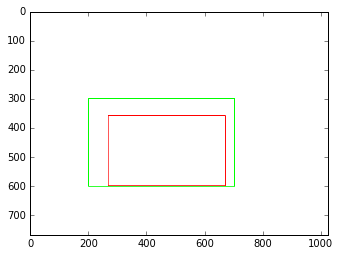

In [24]:
image = np.full((768, 1024, 3), 255, dtype=np.uint8)
jittered_bbx = create_jittered_bbx(bbx, 0.6)
print "jittered_bbx =", jittered_bbx
cv2.rectangle(image, tuple(bbx[:2].astype(np.float32)), tuple(bbx[2:].astype(np.float32)), (0, 255, 0), 2)
cv2.rectangle(image, tuple(jittered_bbx[:2].astype(np.float32)), tuple(jittered_bbx[2:].astype(np.float32)), (255, 0, 0), 2)
plt.imshow(image)

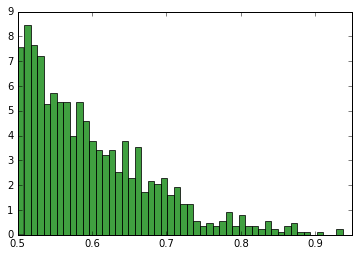

In [26]:
ious = []
for _ in xrange(1000):
    jittered_bbx = create_jittered_bbx(bbx, 0.5)
    ious.append(bbx_iou_overlap(bbx, jittered_bbx))
    
n, bins, patches = plt.hist(ious, 50, normed=1, facecolor='green', alpha=0.75)
plt.show()